# Poincare-Lindstedt method

Real pendulum
$$\ddot{x}+\sin x\approx\ddot{x}+x-\frac{1}{6}x^3=0$$
Rewrite the equation as
$$\ddot{x}+x=\epsilon x^3,\quad\epsilon=-1/6$$
The value $\epsilon$ can be considered as small parameter.
\begin{align}
x(t)&\approx x_0(\omega t)+\epsilon x_1(\omega t)+\dots=x_0(t')+\epsilon x_1(t')+\dots\\
\omega&\approx1+\epsilon \omega_1 + \epsilon^2\omega_2+\dots
\end{align}
$$\hat{t}=\omega t,\quad\frac{d^2}{dt^2}=\omega^2\frac{d^2}{dt'^2}$$
$$(1+\epsilon \omega_1+\dots)^2(\ddot{x}_0+\epsilon \ddot{x}_1+\dots)+x_0+\epsilon x_1+\dots=\epsilon (x_0+\epsilon x_1+\dots)^3$$
$$(\ddot{x}_0+x_0)+\epsilon(\ddot{x}_1+x_1)+\dots=0+\epsilon(x_0^3-2\omega_1\ddot{x_0})+\dots$$
\begin{align}
\ddot{x}_0+x_0&=0\\
\ddot{x}_1+x_1&=-2\omega_1\ddot{x}_0+x_0^3\\
\end{align}
$$x_0=a\cos t$$
$$\ddot{x}_1+x_1=\color{brown}{a(2\omega_1+\frac{3}{4}a^2)\cos t}+\frac{1}{4}a^3\cos 3t=\frac{1}{4}a^3\cos 3t$$
$$\omega_1=-\frac{3}{8}a^2,\quad x_1=\frac{1}{32}a^3(\cos 3t-\cos t)$$
Solution accounting for the next harmonic
$$x\approx a\cos\omega t-\frac{a^3}{192}(\cos 3\omega t-\cos\omega t),\quad \omega\approx 1-\frac{1}{16}a^2$$

TODO: show what is secular (aperiodic) term

TODO: check $x_1$

TODO: find 2nd order correction to $\omega$

## Compare numerical solution with analytical approximation

Equation
\begin{equation}
\ddot{x}+\sin x=0 \qquad
x(0) = x_0 \quad
\dot{x}(0) = 0
\end{equation}
introducing new variable
\begin{equation}
z_1 = x \quad
z_2 = \dot{x}
\end{equation}
get the system of 1st order equation for numerical procedure
\begin{equation}
\frac{d}{dt}
\begin{pmatrix}
z_1 \\ z_2
\end{pmatrix}=
\begin{pmatrix}
z_2 \\
-\sin z_1
\end{pmatrix}
\end{equation}

In [66]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [67]:
def duffing_eqs(z, t):
    return [ z[1], -np.sin(z[0]) ]

Numerical solution

In [68]:
x1 = 0.1  # rad
x2 = np.pi/2
x3 = 0.9*np.pi

t = np.linspace(0, 5*2*np.pi, 100)

sol1 = odeint(duffing_eqs, [x1, 0], t)
sol2 = odeint(duffing_eqs, [x2, 0], t)
sol3 = odeint(duffing_eqs, [x3, 0], t)

In [69]:
def plot_duffing(t, sol, fcn, *, title):
    plt.plot(t, sol, t, fcn)
    plt.xlabel('t')
    plt.ylabel('x')
    plt.legend(['numerical', 'analytic'])
    plt.title(title)

Approximation to analytical solution with frequency correction
$$x(t)\approx x_0\cdot\cos\left(\left(1-\frac{1}{16}x_0^2\right)t\right)$$

In [70]:
def approx_sol_1(t, x0):
    w = 1 - x0**2 / 16
    return x0 * np.cos(w*t)

In [71]:
def approx_sol_2(t, x0):
    w = 1 - x0**2 / 16
    return x0 * np.cos(w*t) - \
           x0**3 / 192 * (np.cos(3*w*t) - np.cos(w*t))

Solution for different amplitudes from $\left[0, \pi\right)$ range

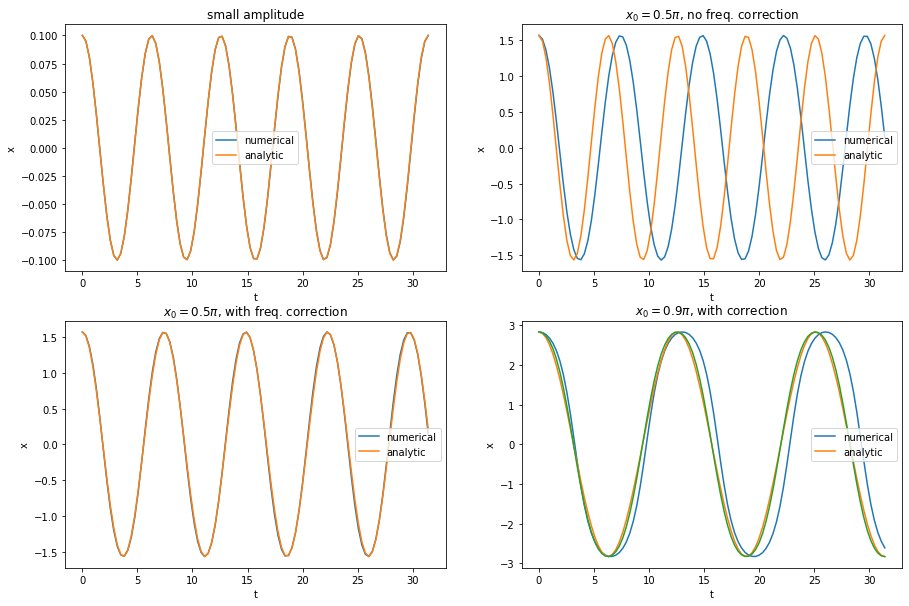

In [72]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plot_duffing(t, sol1[:,0], x1*np.cos(t),
             title='small amplitude')
plt.subplot(2,2,2)
plot_duffing(t, sol2[:,0], x2*np.cos(t),
             title='$x_0=0.5\pi$, no freq. correction')
plt.subplot(2,2,3)
plot_duffing(t, sol2[:,0], approx_sol_1(t, x2),
             title='$x_0=0.5\pi$, with freq. correction')
plt.subplot(2,2,4)
plot_duffing(t, sol3[:,0],
             np.append(np.reshape(approx_sol_1(t, x3), (len(t),1)),
                       np.reshape(approx_sol_2(t, x3), (len(t),1)),
                       axis=1),
             title='$x_0=0.9\pi$, with correction')
plt.show()

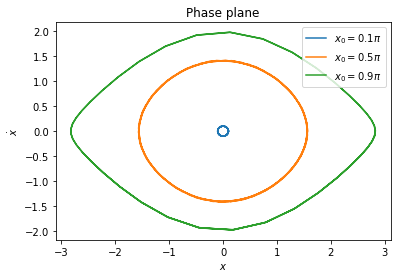

In [73]:
plt.plot(sol1[:,0], sol1[:,1],
         sol2[:,0], sol2[:,1],
         sol3[:,0], sol3[:,1])
plt.title('Phase plane')
plt.xlabel('$x$')
plt.ylabel('$\dot{x}$')
plt.legend(['$x_0=0.1\pi$','$x_0=0.5\pi$','$x_0=0.9\pi$'])
plt.show()